## Statystyka matematyczna I {-}

- Praca domowa 2

- Uladzislau Darhevich 108519

### Zadanie 1 {-}

Trzeba wyznaczyć estymator największej wiarygodności dla rożkładu wykładniczego:
$$X_1, X_2, ... X_n \sim  \text{Ex}(\theta)$$ 

$$ENW(\theta) = ?$$

Gęstość prawdopodobieństwa:

$f(x) = \left\{ \begin{array}{cl}
\theta e^{-\theta x} & : \ x \geq 0 \\
0 & : \ x < 0
\end{array} \right.$

Wtedy

$$L(\theta, X_1, X_2, ...X_n) = \theta e^{-\theta x_1} \cdot \theta e^{-\theta x_2}\cdot ...\cdot \theta e^{-\theta x_n}$$

$$L(\theta, X_1, X_2, ...X_n) = \theta ^n\cdot exp(-\theta\sum\limits_{i=1}^{n}x_i)$$

$$\ln L(\theta, X_1, X_2, ...X_n) = n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i$$

Możemy przekształcić to wyrażenie i otrzymujemy

$$\frac{d }{d\theta}\ln L(\theta, X_1, X_2, ...X_n) = 0$$

$$\frac{d }{d\theta}(n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i)=\frac{n}{\theta}-\sum\limits_{i=1}^{n}x_i = 0$$

$$\theta = \frac{n}{\sum\limits_{i=1}^{n}x_i}$$

Zatem estymator jest odwrotnością średniej z próby.

$$ENW(\theta) = \frac{1}{\overline{x}}$$

### Zadanie 2 {-}

Wyznaczyć obciążenie $b(\theta)$ oraz ryzyko $R(\theta)$ dla estymatora. Czy estymator jest obciążony?

$$\mathbb{E}X = \frac{1}{\theta}, \text{Var}X = \frac{1}{\theta^2}$$

$$T= \frac{n}{\sum\limits_{i=1}^{n}x_i}\Longrightarrow \mathbb{E}T=n\mathbb{E}(\frac{1}{\sum\limits_{i=1}^{n}x_i})$$

$$\sum_{i=1}^{n}x_i \sim \text{Gamma}(n, \theta)\Rightarrow \frac{1}{\sum_{i=1}^{n}x_i}\sim \text{IG}(n, \theta)$$

$$\mathbb{E}\frac{1}{\sum_{i=1}^{n}x_i} = \frac{\theta}{n-1}$$

Z tego, że $$b(\theta) = \mathbb{E}T - \theta = \frac{n\theta}{n-1} - \theta = \frac{\theta}{n-1} > 0$$ wychodzi, że estymator jest **obciążony**.

$$\text{Var }T=\text{Var}{\frac{n}{\sum_{i=1}^{n}x_i}}=n^2\cdot \text{Var}{\frac{1}{\sum_{i=1}^{n}x_i}} = n^2\cdot \frac{\theta^2}{(n-1)^2(n-2)}$$

Wtedy ryzyko $R(\theta)$ równa sie $$R(\theta)=n^2\frac{\theta^2}{(n-1)^2(n-2)}+\frac{\theta^2}{(n-1)^2}=\frac{\theta^2(n+2)}{(n-2)(n-1)}$$

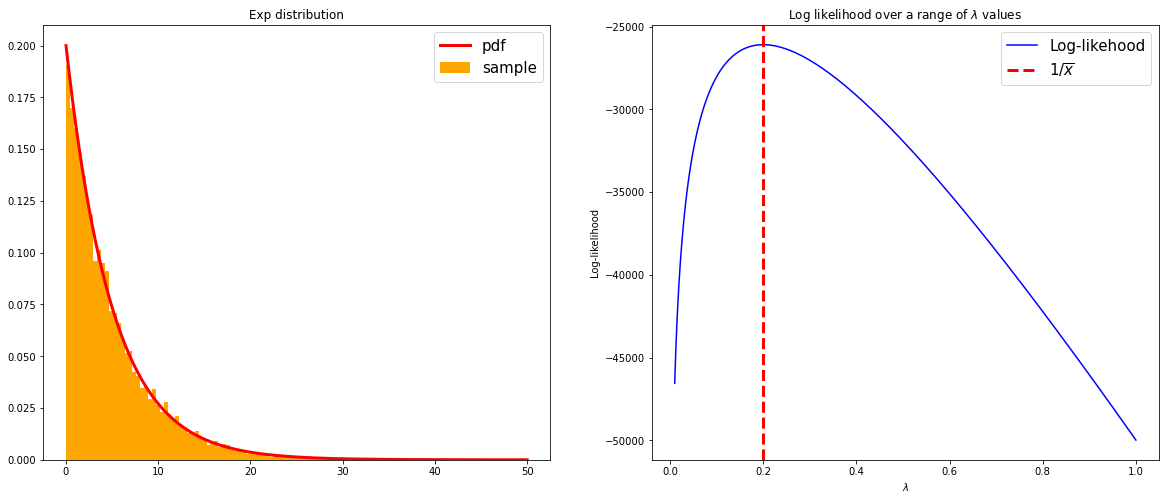

In [4]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

scale = 5
sample_size = 10_000

dist =  np.random.exponential(scale, sample_size)
h = 1/np.mean(dist)
lambda_array = np.geomspace(0.01, 1, 100)
LL = []
for L in lambda_array:
    loglik = np.log(L)-L*dist
    LL.append(loglik.sum())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

xs = np.arange(0, 50, 0.001)
ys = expon.pdf(xs, scale=scale)
ax1.plot(xs, ys, label='pdf', lw=3, color='red')
ax1.hist(dist, density=True, label='sample', bins=100, color='orange')
ax1.set_title('Exp distribution')
ax1.legend(fontsize=15)

ax2.plot(lambda_array, LL, color='blue', label='Log-likehood')
ax2.axvline(h, color="red", linestyle='--', lw=3, label="$1/{\overline{x}}$")
ax2.set_title('Log likelihood over a range of $\lambda$ values')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('Log-likelihood')
ax2.legend(fontsize=15)

plt.show()